# Question 4: Classification and Policy Implications 
**Task:** 
Build a classifier to identify countries that are likely to achieve a significant reduction in 
CO2 emissions in the next decade. Answer the business case question: “What are the 
common characteristics of countries that successfully reduce emissions, and how can 
policymakers in other nations apply these insights?” 
 
**Instructions:** 
1. Define a binary target variable indicating whether a country is likely to reduce its CO2 
emissions significantly in the next decade. 
2. Train a classification model using the comprehensive set of indicators. 
3. Evaluate the classifier's performance using metrics like accuracy, precision, recall, and F1 
score. 
4. Analyze the key features driving the classification and identify common characteristics of 
successful countries. 
5. Provide policy recommendations based on the insights gained. 

**How to use**
- You can run all cells.
- Please refer to the deliverables folder and the [q4.md](deliverables/q4.md) file for an overview of the results of this first question.

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns

In [2]:
df = pd.read_csv('clean_data/initial_q4.csv')
df.head()

,Country Name,reduced_cotwo_emi,Year,Value,Indicator Name
0,Australia,0,1990,5061.500154,en_use
1,Austria,1,1990,3240.111359,en_use
2,Belgium,1,1990,4809.867268,en_use
3,Canada,0,1990,7630.092306,en_use
4,Switzerland,1,1990,3627.692811,en_use


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6916 entries, 0 to 6915
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       6916 non-null   object 
 1   reduced_cotwo_emi  6916 non-null   int64  
 2   Year               6916 non-null   int64  
 3   Value              6916 non-null   float64
 4   Indicator Name     6916 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 270.3+ KB


In [4]:
# Pivot the data to have years as rows and indicators as columns
df_pivot = df.pivot_table(index=["Country Name", "Year", "reduced_cotwo_emi"], columns="Indicator Name", values="Value").reset_index()

# Move 'reduced_cotwo_emi' to the last column
columns = list(df_pivot.columns)
columns.append(columns.pop(columns.index('reduced_cotwo_emi')))
df_pivot = df_pivot[columns]

df_pivot.head()

Indicator Name,Country Name,Year,cotwo_emi,en_use,gdp,popu_total,prim_comp_rate,ren_elec_out,urban_popu,reduced_cotwo_emi
0,Australia,1990,263437.5,5061.500154,3.114205e+11,17065128.0,51.212158,9.656031,14579251.0,0
1,Australia,1991,264709.7,4927.771326,3.259667e+11,17284036.0,76.901360,10.598201,14761085.0,0
2,Australia,1992,268366.5,4963.858162,3.255185e+11,17478635.0,53.901711,10.066865,14906654.0,0
3,Australia,1993,273016.9,5156.933379,3.121283e+11,17634808.0,58.607170,10.549144,15017273.0,0
4,Australia,1994,280096.3,5103.947956,3.228025e+11,17805468.0,60.734459,10.194474,15139633.0,0


In [5]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       988 non-null    object 
 1   Year               988 non-null    int64  
 2   cotwo_emi          988 non-null    float64
 3   en_use             988 non-null    float64
 4   gdp                988 non-null    float64
 5   popu_total         988 non-null    float64
 6   prim_comp_rate     988 non-null    float64
 7   ren_elec_out       988 non-null    float64
 8   urban_popu         988 non-null    float64
 9   reduced_cotwo_emi  988 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 77.3+ KB


In [6]:
# Checking for dataset imbalance
df_pivot.reduced_cotwo_emi.value_counts()

reduced_cotwo_emi
1    546
0    442
Name: count, dtype: int64

In [7]:
df_pivot.columns

Index(['Country Name', 'Year', 'cotwo_emi', 'en_use', 'gdp', 'popu_total',
       'prim_comp_rate', 'ren_elec_out', 'urban_popu', 'reduced_cotwo_emi'],
      dtype='object', name='Indicator Name')

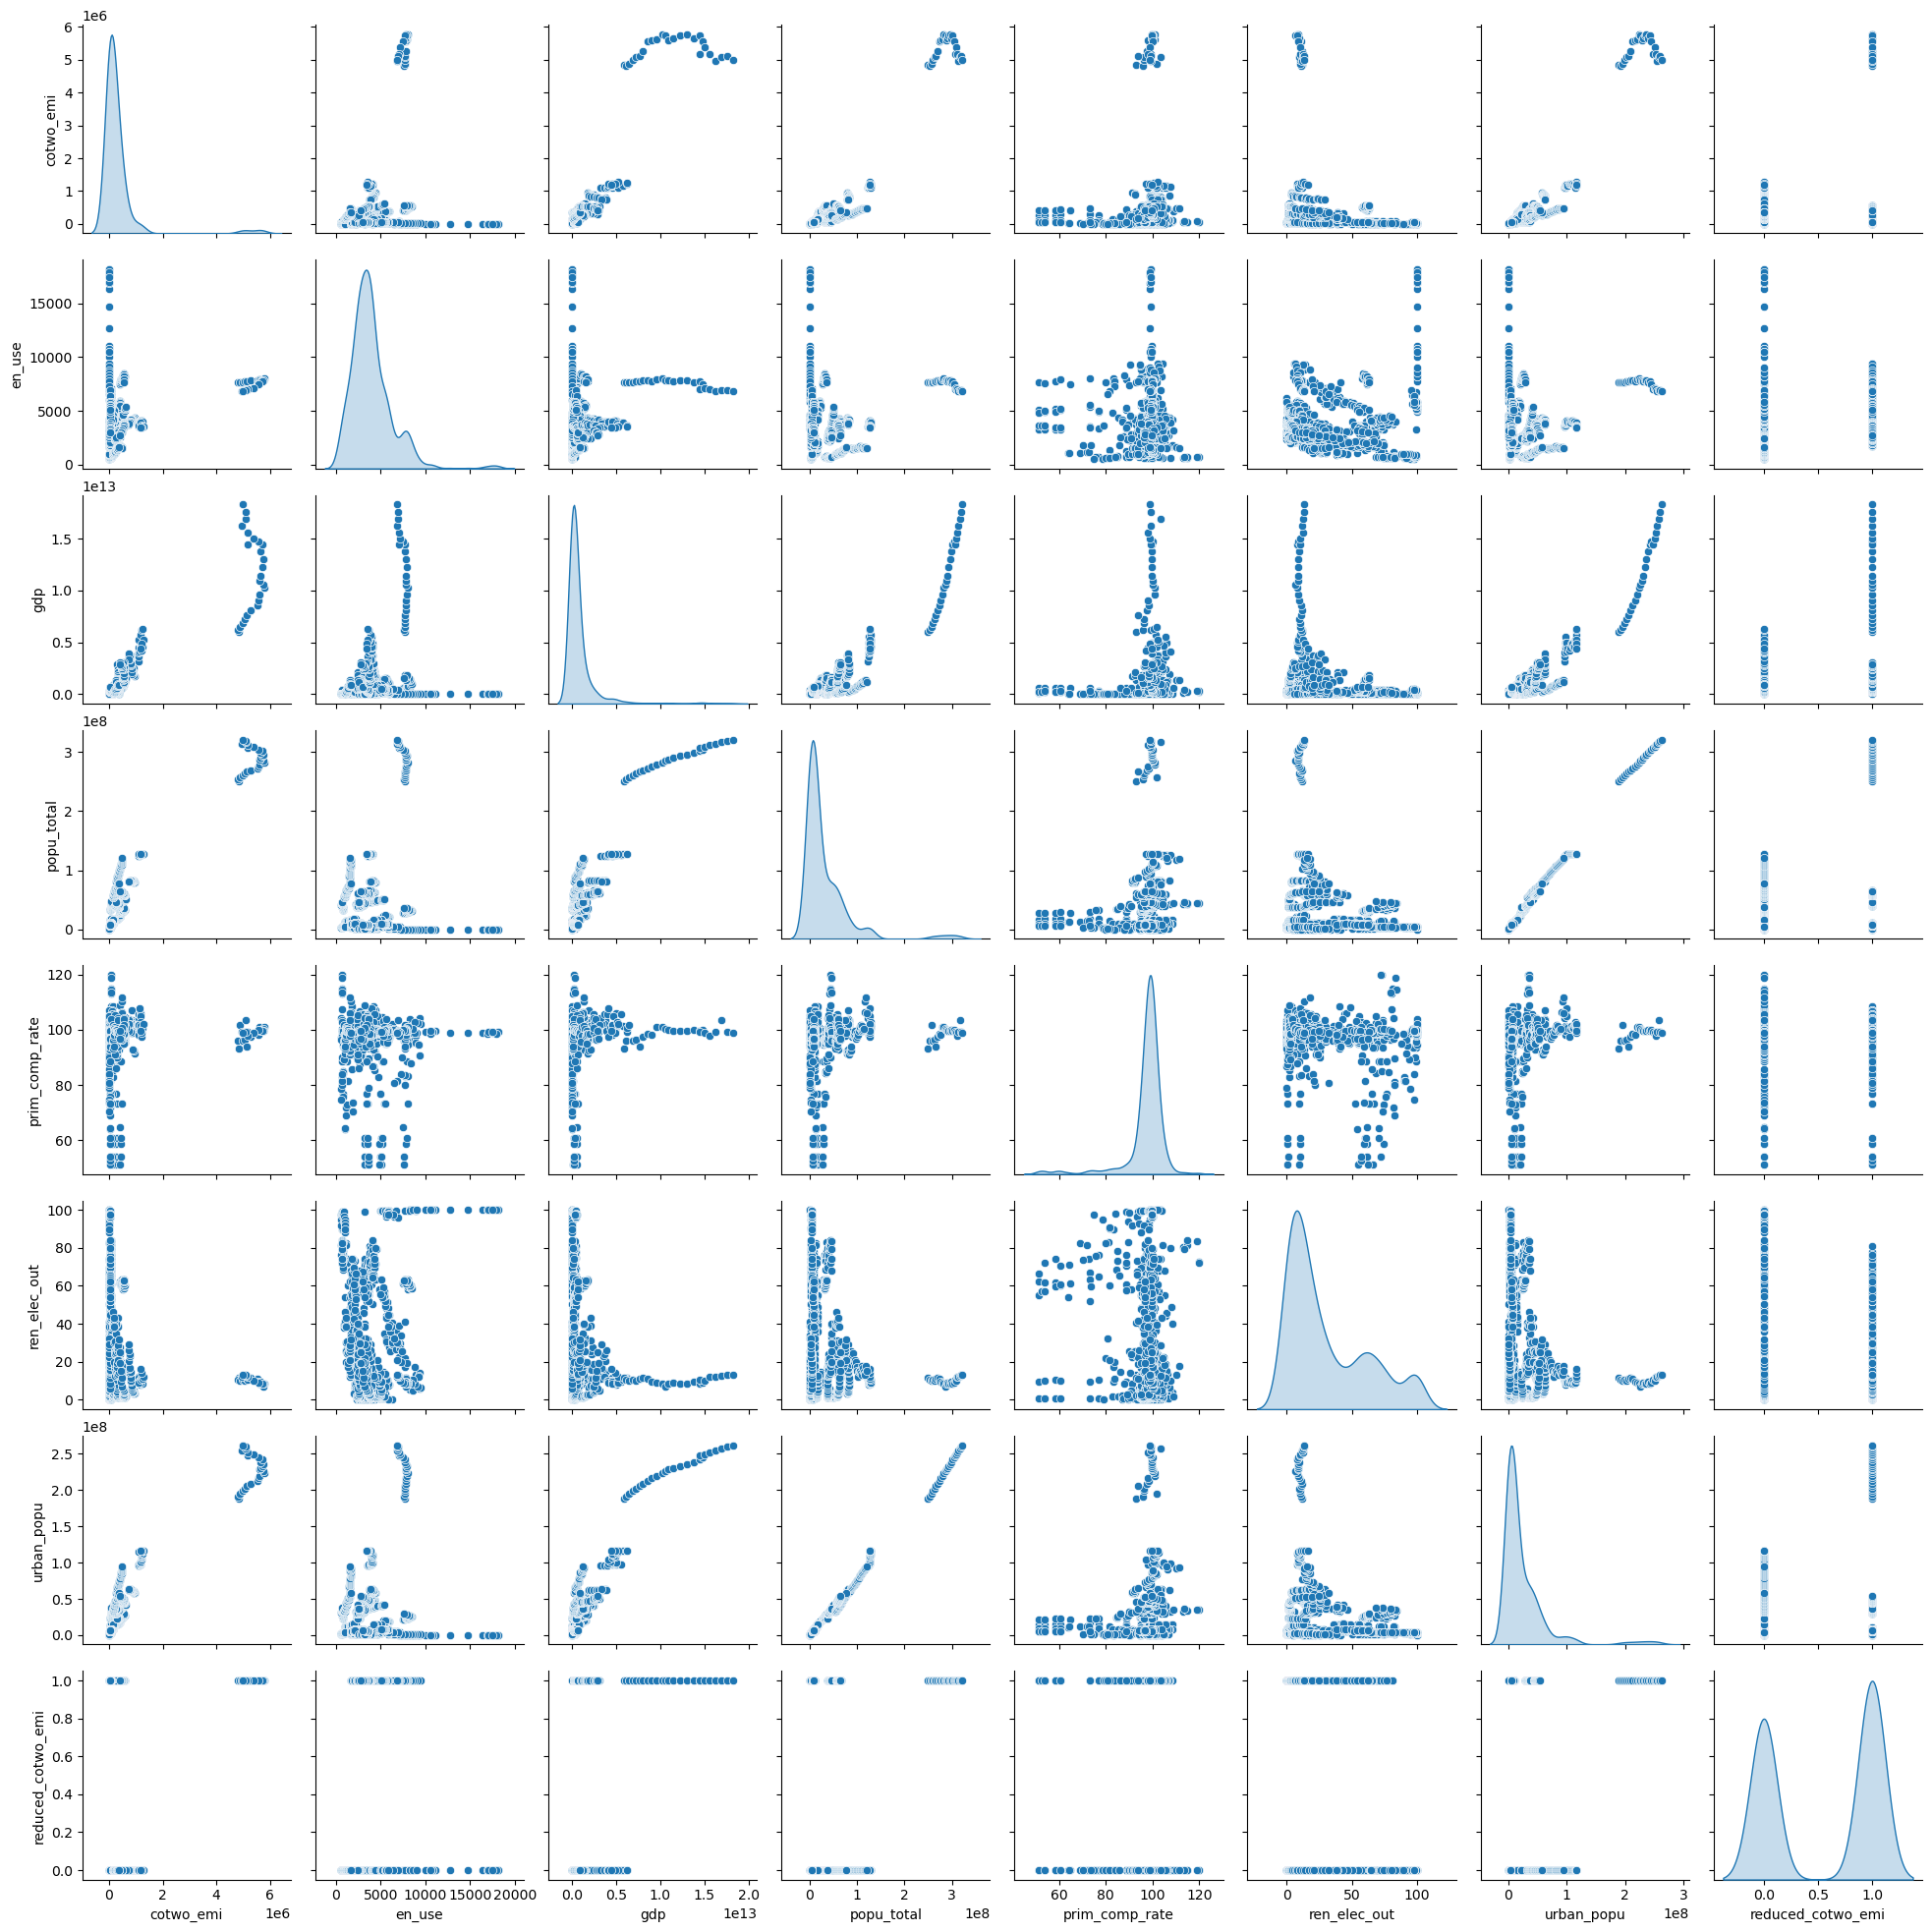

In [8]:
sns.pairplot(df_pivot[['cotwo_emi', 'en_use', 'gdp', 'popu_total', 'prim_comp_rate', 'ren_elec_out', 'urban_popu', 'reduced_cotwo_emi']], diag_kind='kde')
plt.show()

In [9]:
# One-hot encoding the 'Country Name' column
df_encoded = pd.get_dummies(df_pivot, columns=['Country Name'], drop_first=True)
df_encoded.head()

,Year,cotwo_emi,en_use,gdp,popu_total,prim_comp_rate,ren_elec_out,urban_popu,reduced_cotwo_emi,Country Name_Austria,...,Country Name_Poland,Country Name_Portugal,Country Name_Slovak Republic,Country Name_Slovenia,Country Name_Spain,Country Name_Sweden,Country Name_Switzerland,Country Name_Turkiye,Country Name_United Kingdom,Country Name_United States
0,1990,263437.5,5061.500154,3.114205e+11,17065128.0,51.212158,9.656031,14579251.0,0,False,...,False,False,False,False,False,False,False,False,False,False
1,1991,264709.7,4927.771326,3.259667e+11,17284036.0,76.901360,10.598201,14761085.0,0,False,...,False,False,False,False,False,False,False,False,False,False
2,1992,268366.5,4963.858162,3.255185e+11,17478635.0,53.901711,10.066865,14906654.0,0,False,...,False,False,False,False,False,False,False,False,False,False
3,1993,273016.9,5156.933379,3.121283e+11,17634808.0,58.607170,10.549144,15017273.0,0,False,...,False,False,False,False,False,False,False,False,False,False
4,1994,280096.3,5103.947956,3.228025e+11,17805468.0,60.734459,10.194474,15139633.0,0,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
X = df_encoded.drop(columns=['Year', 'reduced_cotwo_emi', 'cotwo_emi'])
y = df_encoded['reduced_cotwo_emi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42, n_estimators=100)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00       185

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



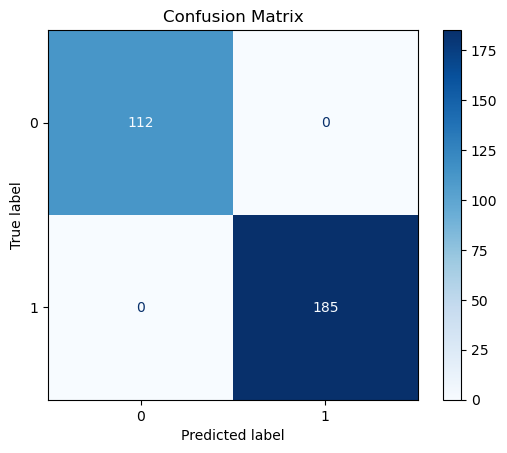

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title('Confusion Matrix')
plt.show()

In [12]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head())

              importance
ren_elec_out    0.171280
urban_popu      0.165139
popu_total      0.145515
en_use          0.135721
gdp             0.056395


In [13]:
# Cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

clf = RandomForestClassifier(random_state=42, n_estimators=100)

cv_accuracy = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
cv_precision = cross_val_score(clf, X, y, cv=skf, scoring='precision')
cv_recall = cross_val_score(clf, X, y, cv=skf, scoring='recall')
cv_f1 = cross_val_score(clf, X, y, cv=skf, scoring='f1')

print(f"Accuracy: {cv_accuracy.mean():.3f} ± {cv_accuracy.std():.3f}")
print(f"Precision: {cv_precision.mean():.3f} ± {cv_precision.std():.3f}")
print(f"Recall: {cv_recall.mean():.3f} ± {cv_recall.std():.3f}")
print(f"F1 Score: {cv_f1.mean():.3f} ± {cv_f1.std():.3f}")


Accuracy: 1.000 ± 0.000
Precision: 1.000 ± 0.000
Recall: 1.000 ± 0.000
F1 Score: 1.000 ± 0.000
